# **Medical Data Visualizer** ⛑️

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1- Overview 🔎
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Introduction:** <br>
In this project, we will analyze medical examination data to explore the relationship between various health factors and the presence or absence of cardiovascular disease. Using matplotlib, seaborn, and pandas, we aim to visualize key insights and make calculations based on the provided dataset.

[freecodecamp | data-analysis-with-python-projects | medical-data-visualizer](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer)

**Problem Statement:** <br>
The goal is to investigate the impact of body measurements, blood markers, and lifestyle choices on cardiovascular health. This involves creating visualizations, calculating body mass index (BMI) to determine overweight status, normalizing data for specific features, and cleaning the dataset to ensure accuracy. Additionally, we aim to identify correlations between different health parameters.

**Data Source:** <br>
File Name: medical_examination.csv

Features:
- Age: Objective Feature (int, days)
- Height: Objective Feature (int, cm)
- Weight: Objective Feature (float, kg)
- Gender: Objective Feature (categorical code)
- Systolic Blood Pressure (ap_hi): Examination Feature (int)
- Diastolic Blood Pressure (ap_lo): Examination Feature (int)
- Cholesterol: Examination Feature (1: normal, 2: above normal, 3: well above normal)
- Glucose: Examination Feature (1: normal, 2: above normal, 3: well above normal)
- Smoking: Subjective Feature (binary)
- Alcohol Intake: Subjective Feature (binary)
- Physical Activity: Subjective Feature (binary)
- Cardiovascular Disease: Target Variable (binary)

**Data Exploration:** <br>
1. Create a chart: Generate a chart depicting the counts of good and bad outcomes for cholesterol, glucose, alcohol intake, physical activity, and smoking variables for patients with cardiovascular disease (cardio=1) and those without (cardio=0). The chart will be split by cardio value, resembling the provided example in Figure_1.png.

2. Add Overweight Column: Calculate BMI and add an 'overweight' column. If BMI > 25, set the value to 1 (overweight); otherwise, set it to 0 (not overweight).

3. Normalize Data: Ensure consistency by making 0 always good and 1 always bad. Normalize cholesterol and glucose values accordingly.

4. Convert to Long Format: Use seaborn's catplot() to create a chart showing the value counts of categorical features, split by 'Cardio.'

5. Clean Data: Filter out incorrect data segments, including diastolic pressure higher than systolic and outliers in height and weight.

6. Create Correlation Matrix: Generate a correlation matrix using the dataset and plot it using seaborn's heatmap. Mask the upper triangle for clarity. The chart should resemble Figure_2.png.

## 2- Preparation 📖
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
- data collection
- data cleaning
- data transformation

In [39]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Convert age from days to years
df['age'].replace(df['age'] // 365, inplace=True)

In [61]:
# Count the number of people at each age
age_distribution = df['age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Number of People']

# Sort the DataFrame by age in descending order (from oldest to youngest)
age_distribution = age_distribution.sort_values(by='Age', ascending=False)

# Display the sorted DataFrame
print(age_distribution)

    Age  Number of People
14   64              2392
13   63              2586
16   62              2286
11   61              2904
12   60              2802
7    59              3444
4    58              3553
0    57              3992
9    56              3252
1    55              3957
3    54              3601
6    53              3485
10   52              3211
8    51              3339
5    50              3552
2    49              3723
20   48              1803
17   47              2222
22   46              1676
21   45              1698
23   44              1600
15   43              2297
25   42              1326
18   41              1938
24   40              1518
19   39              1842
26   29                 1


## 3- Data Analysis 🕵️
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### A- Add 'overweight' column to the data

- Calculate BMI by dividing weight in kilograms by the square of height in meters.
- If BMI > 25, set the 'overweight' column to 1, otherwise set it to 0.

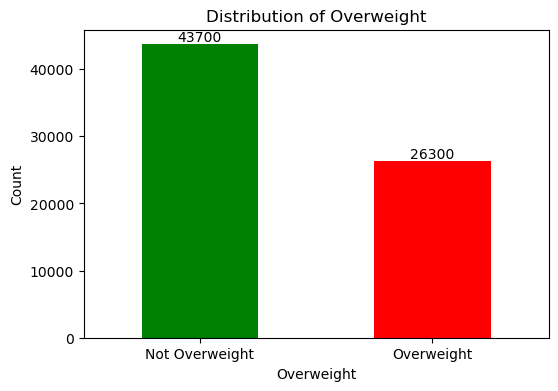

In [54]:
BMI = round((df['weight'] / (df['height'] / 100) ** 2), 2)
df['overweight'] = BMI >= 25
df['overweight'] = df['overweight'].astype(int) #convert Boolean to integer 0 for NOT overweight and 1 for overweight 

# Plot the 'overweight' distribution with values on top of bars
plt.figure(figsize=(6, 4))
ax = df['overweight'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Overweight')
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Overweight', 'Overweight'], rotation=0)

# Add values on top of bars
for i, value in enumerate(df['overweight'].value_counts()):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

#### B- Normalize data by making 0 always good and 1 always bad

For 'cholesterol' and 'gluc':
- If the value is 1, make it 0.
- If the value is more than 1, make it 1.

In [46]:
# normalize the 'cholesterol' column
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

# normalize the 'gluc' column
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

print(df['cholesterol'].value_counts())
print(df['gluc'].value_counts())

cholesterol
0    52385
1    17615
Name: count, dtype: int64
gluc
0    59479
1    10521
Name: count, dtype: int64


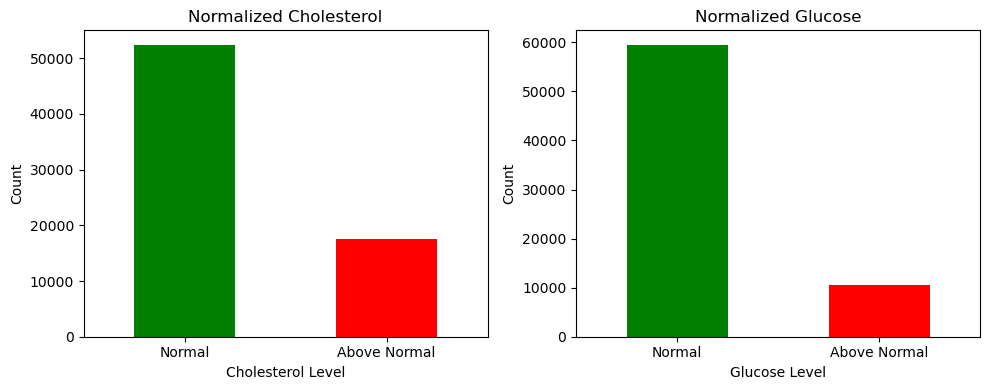

In [56]:
# Plot the normalized 'cholesterol' column
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['cholesterol'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Normalized Cholesterol')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Above Normal'], rotation=0)

# Plot the normalized 'gluc' column
plt.subplot(1, 2, 2)
df['gluc'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Normalized Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Above Normal'], rotation=0)

plt.tight_layout()
plt.show()


#### C- Convert to Long Format and Create Chart

- Use seaborn's catplot() to create a chart.
- Show the value counts of categorical features.
- Split the dataset by 'Cardio' so there is one chart for each cardio value.

/Users/aj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


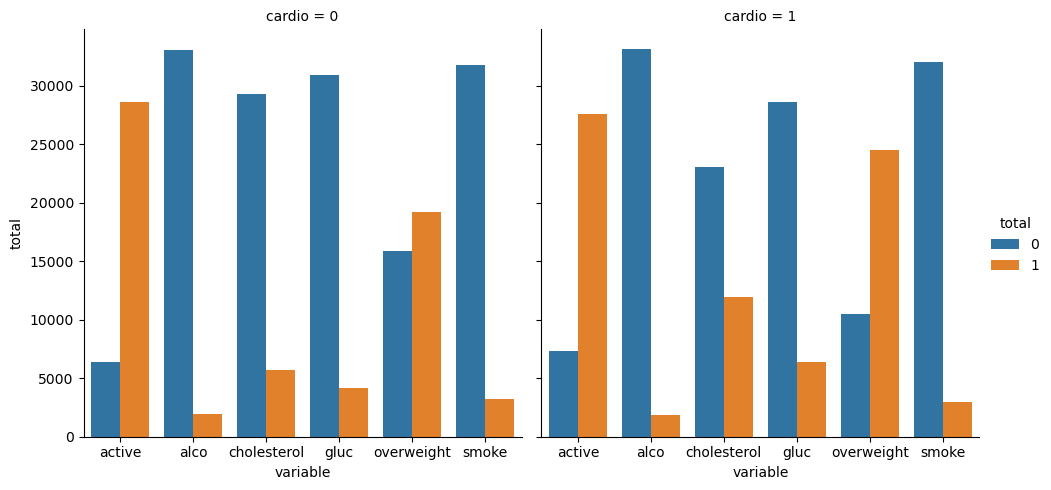

In [48]:

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars=['cardio'])

# Rename the columns
df_cat = df_cat.rename(columns={'variable': 'variable', 'value': 'total', 'cardio': 'cardio'})

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
df_cat = df_cat.groupby(['variable', 'cardio', 'total'], as_index=False).size()

# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, x='variable', y='size', hue='total', col='cardio', kind='bar')
fig.set(xlabel='variable', ylabel='total')

# Get the figure for the output
fig = fig.fig

# Save the figure as 'catplot.png'
fig.savefig('catplot.png')

# Show the figure
plt.show()

#### D- Clean the data

Filter out the following patient segments that represent incorrect data:**
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [49]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

#### E- Create Correlation Matrix

- Use the dataset to create a correlation matrix.
- Plot the matrix using seaborn's heatmap().
- Mask the upper triangle for clarity.

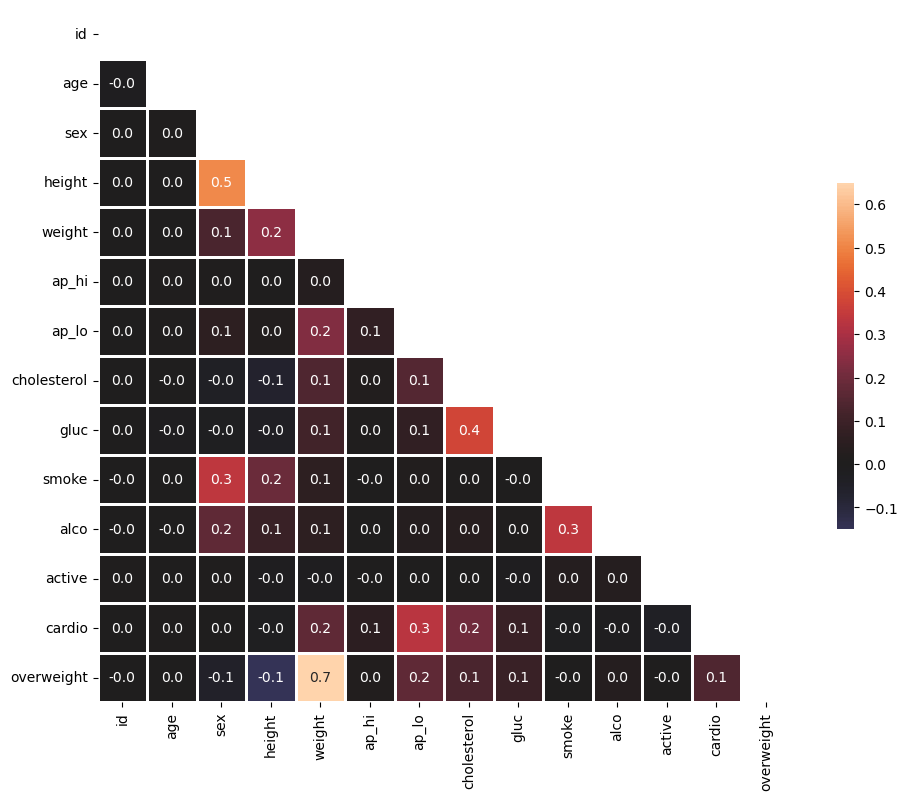

In [50]:
# Calculate the correlation matrix
corr = round((df_heat.corr()),2)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap with 'sns.heatmap()'

sns.heatmap(corr,mask=mask, fmt='.1f', linewidths=1,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)

plt.show()

In [51]:
# Save the figure as 'catplot.png'
fig.savefig('heatmap.png')

## 4- Conclusion ✍️
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

The analysis of the dataset reveals several significant insights into the demographic and health-related characteristics of the users:

- Age Distribution:

The majority of users fall within the age range of 50 to 60, indicating that the platform has a higher user concentration in this demographic.

- Overweight Status:

A substantial portion of users, approximately 43,700, is not overweight, while around 26,300 users are classified as overweight based on BMI calculations. This indicates a diverse user base in terms of body weight.

- Cholesterol Levels:

The distribution of cholesterol levels shows that a significant number of users (52,385) have normal cholesterol levels (cholesterol=0), while 17,615 users exhibit above-normal levels (cholesterol=1). Monitoring and addressing cholesterol levels could be a priority for a portion of the user base.

- Glucose Levels:

A large majority of users (59,479) have normal glucose levels (gluc=0), while a smaller portion (10,521) exhibit above-normal glucose levels (gluc=1). This insight emphasizes the importance of managing glucose levels for a significant portion of the user base.

- Correlation Insights:

    - Height and sex show a moderate positive correlation of 0.5, indicating a tendency for taller individuals to be of a particular gender.
    - Weight and overweight status exhibit a high positive correlation of 0.7, suggesting that higher weight is strongly associated with being classified as overweight.
    - Surprisingly, height and overweight status show a lower correlation of 0.7, implying that being taller does not necessarily correlate strongly with being overweight.
    - The correlation between smoking and alcohol intake is 0.3, indicating a mild positive correlation. Users who smoke might have a slightly higher tendency to consume alcohol, but the correlation is not strong.

These insights can guide further investigations and tailored health interventions to address specific health concerns and demographics within the user community.